In [1]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [2]:
import json
from pprint import pprint

df = pd.DataFrame()

with open('/Users/danielkershaw/Downloads/part-00004 (3)') as data_file:
    for l in data_file:
        data = json.loads(l)
        df = pd.concat((df, pd.read_json(data)))


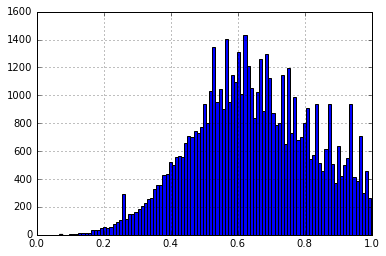

In [3]:
df[(df["popularity"]< 1)]["popularity"].hist(bins=100)

In [5]:
word_popularity = df.pivot(index='word', columns='timedelta', values='popularity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119fceb50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118f66a10>]], dtype=object)

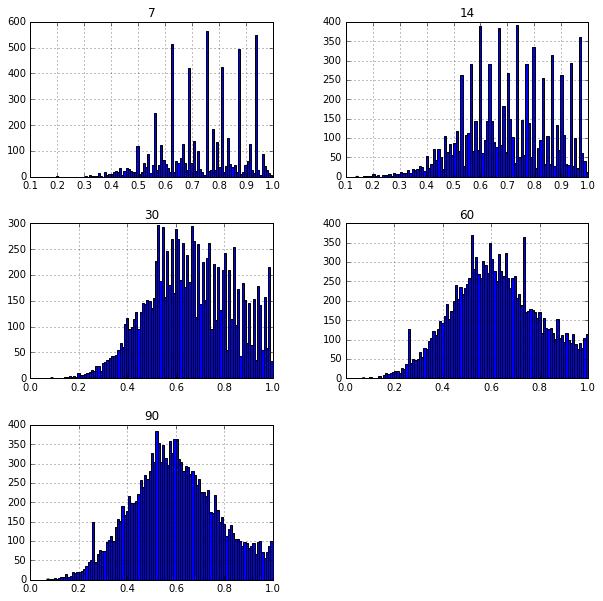

In [75]:
df[(df["popularity"]< 1)].pivot(index='word', columns='timedelta', values='popularity').hist(bins=100, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a6afd50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c19d490>]], dtype=object)

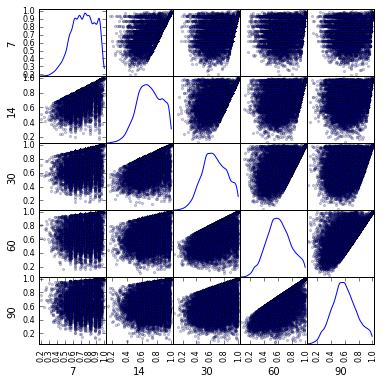

In [76]:
scatter_matrix(df[(df["popularity"]< 1)].pivot(index='word', columns='timedelta', values='popularity'), alpha=0.2, figsize=(6, 6), diagonal='kde')

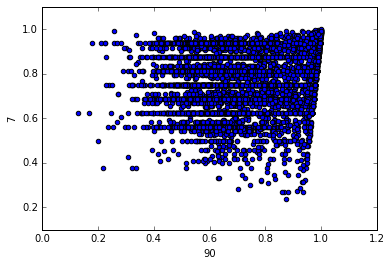

In [71]:
df[(df["popularity"]< 1)].pivot(index='word', columns='timedelta', values='popularity').plot(kind='scatter',x=90, y=7)

In [68]:
df[(df["popularity"]==0.5)&(df["timedelta"]==90)]

,activations,popularity,timedelta,word
13290,"{""1413244800000"":0.1666666667,""1413331200000"":...",0.5,90,mangeurs
14515,"{""1413417600000"":0.1,""1413504000000"":0.1,""1413...",0.5,90,goosy
15250,"{""1413072000000"":0.25,""1413158400000"":0.25,""14...",0.5,90,uberpop
17375,"{""1413331200000"":0.25,""1413417600000"":0.25,""14...",0.5,90,natoo
18300,"{""1413158400000"":0.1,""1413244800000"":0.1,""1413...",0.5,90,lavee
19630,"{""1411862400000"":0.1666666667,""1411948800000"":...",0.5,90,slimebag
22575,"{""1412467200000"":0.1,""1412553600000"":0.1,""1412...",0.5,90,unlick
28650,"{""1417651200000"":0.125,""1417737600000"":0.125,""...",0.5,90,gigismayfair
3095,"{""1412899200000"":0.1666666667,""1412985600000"":...",0.5,90,intimidad
32185,"{""1411862400000"":0.1666666667,""1411948800000"":...",0.5,90,bombae


In [52]:
matrix = word_popularity.fillna(0).reset_index()
x_cols = matrix.columns[1:]

In [53]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=6)
matrix['cluster'] = cluster.fit_predict(matrix[x_cols])
matrix.cluster.value_counts()

0    3368
4    3222
3    3216
1    3155
2    3027
5    1623
Name: cluster, dtype: int64

In [54]:
matrix.columns[1:-1]

Index([7, 14, 30, 60, 90], dtype='object', name=u'timedelta')

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['word', 'cluster', 'x', 'y']]
customer_clusters.head()

timedelta,word,cluster,x,y
0,aaabaaajss,3,0.167535,0.380206
1,aaaiiirrr,1,0.365654,0.297109
2,aaapple,5,0.357011,-0.127301
3,aabis,1,0.546115,0.067122
4,aaci,3,0.197617,0.442879


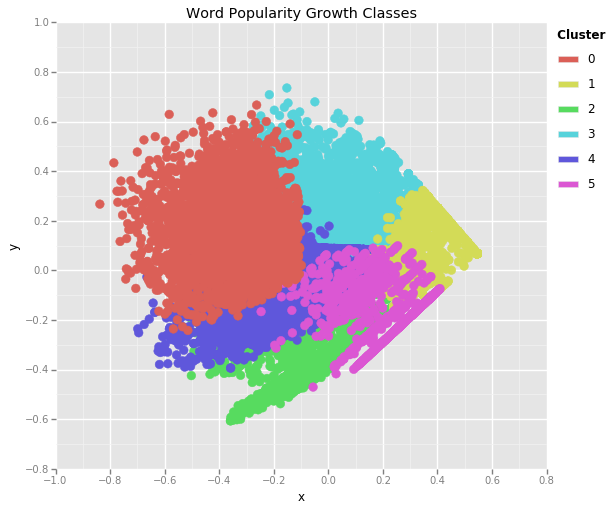

<ggplot: (311755741)>

In [56]:
from ggplot import *

ggplot(customer_clusters, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Word Popularity Growth Classes")

timedelta              7        14        30        60        90  cluster
word                                                                     
zaofu           0.673077  0.606202  0.524352  0.602611  0.617462        0
flavorah        0.687500  0.580952  0.381589  0.511319  0.614138        0
morlings        0.583333  0.616667  0.664516  0.567213  0.561224        0
negaba          1.000000  0.566667  0.790323  0.622951  0.626374        0
upmoted         0.875000  0.680952  0.547347  0.631694  0.707033        0
contrapartidas  1.000000  0.600000  0.580645  0.598361  0.730769        0
perly           1.000000  0.566667  0.790323  0.479508  0.538462        0
timedelta           7        14        30        60        90  cluster
word                                                                  
kelik        0.875000  0.933333  0.967742  0.983607  0.989011        1
ajdnnw       0.883333  0.862745  0.901434  0.906816  0.895604        1
wahhabiism   1.000000  1.000000  0.661290  0.82786

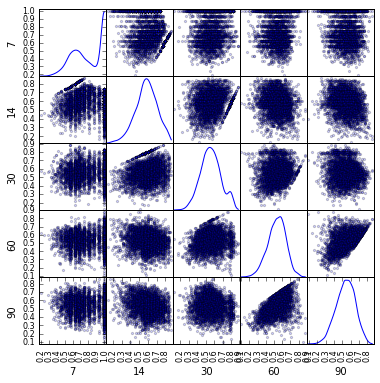

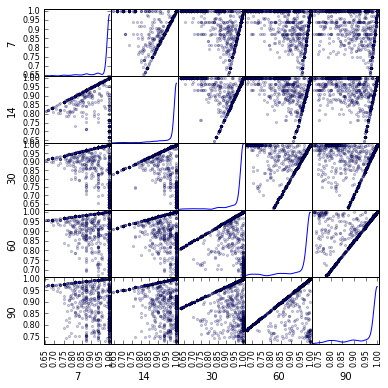

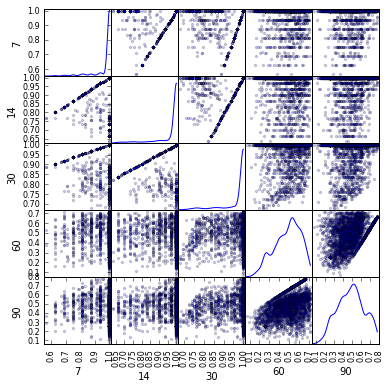

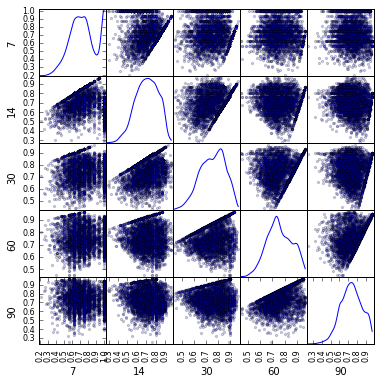

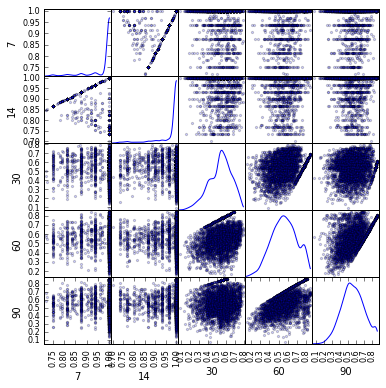

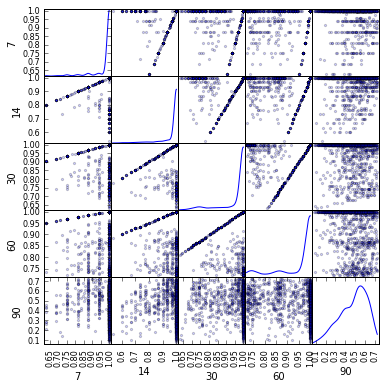

In [59]:
m = matrix[["word",7,14,30,60,90,"cluster"]].set_index(["word"])
for c in set(matrix["cluster"].values):
    print m[(m["cluster"] == c)].sample(n=7)
    scatter_matrix(m[(m["cluster"] == c)].drop('cluster', 1), alpha=0.2, figsize=(6, 6), diagonal='kde')